In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import random
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display
import tensorflow_hub as hub

# Set the seed value for experiment reproducibility.
#seed = 42
#tf.random.set_seed(seed)
#np.random.seed(seed)

In [ ]:
def preprocess_audio(audio,labels):
  audio = tf.cast(audio,tf.float32)
  audio = audio/32912
  return audio,labels

In [ ]:
pip install pydub

In [ ]:
dataset_name = "speech_commands"

# Download and prepare the dataset
ds_builder = tfds.builder(dataset_name)
ds_builder.download_and_prepare()

# Access the class names
class_names = ds_builder.info.features['label'].names

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/85511 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/speech_commands/0.0.3.incompleteEWXQBW/speech_commands-train.tfrecord*...:…

Generating validation examples...:   0%|          | 0/10102 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/speech_commands/0.0.3.incompleteEWXQBW/speech_commands-validation.tfrecord…

Generating test examples...:   0%|          | 0/4890 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/speech_commands/0.0.3.incompleteEWXQBW/speech_commands-test.tfrecord*...: …

Dataset speech_commands downloaded and prepared to /root/tensorflow_datasets/speech_commands/0.0.3. Subsequent calls will reuse this data.


In [ ]:
target_dataset = "speech_commands"
datasets = tfds.list_builders()

In [ ]:
target_dataset in datasets

True

In [ ]:
(train_ds,test_ds, val_ds ) ,ds_info = tfds.load(target_dataset,
                                        batch_size=32,
                                        split = ["train","validation","test"],
                                        with_info = True,
                                        as_supervised=True,
                                        )

In [ ]:
# Preprocess the data
train_ds = train_ds.map(preprocess_audio, tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess_audio, tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess_audio, tf.data.AUTOTUNE)


In [ ]:
class_names

['down',
 'go',
 'left',
 'no',
 'off',
 'on',
 'right',
 'stop',
 'up',
 'yes',
 '_silence_',
 '_unknown_']

In [ ]:
train_ds

<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
test_ds

<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
val_ds

<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
sample = train_ds.take(1)
sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
train_ds.element_spec

(TensorSpec(shape=(None, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

In [ ]:
for audio, label in sample:
  print(audio)
  print(label)

tf.Tensor(
[[-4.5576080e-04 -5.4691295e-04 -3.6460866e-04 ...  4.8614488e-04
   6.3806516e-04  7.5960136e-04]
 [ 2.2788041e-03  8.8113756e-04 -2.5826446e-03 ... -1.0421731e-02
   9.2367530e-03  2.6707584e-02]
 [ 0.0000000e+00  0.0000000e+00  6.0768110e-05 ...  6.0768110e-05
   3.0384055e-05  3.0384055e-05]
 ...
 [-9.1152164e-05 -1.2153622e-04 -1.2153622e-04 ... -1.2153622e-04
  -1.5192028e-04 -1.5192028e-04]
 [ 1.0026738e-03  1.7318911e-03  2.2180360e-03 ...  9.1152161e-04
   1.2153622e-03  2.1268837e-03]
 [ 0.0000000e+00  1.2153622e-04 -3.0384055e-05 ...  2.1268838e-04
   4.5576080e-04  3.3422461e-04]], shape=(32, 16000), dtype=float32)
tf.Tensor(
[ 4  5  7  5  7  2 11  7  6  6 11  6  6 11 11 11 10 11 11 11 11 11 11  5
 11  1  7 11 11 11 11  9], shape=(32,), dtype=int64)


In [ ]:
audio.shape, label.shape

(TensorShape([32, 16000]), TensorShape([32]))

In [ ]:
sample_audio = audio[0]
sample_label = label[0]

In [ ]:
sample_audio,sample_label

(<tf.Tensor: shape=(16000,), dtype=float32, numpy=
 array([-0.00045576, -0.00054691, -0.00036461, ...,  0.00048614,
         0.00063807,  0.0007596 ], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=int64, numpy=4>)

In [ ]:
max(sample_audio),min(sample_audio)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.38426715>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.61573285>)

In [ ]:
sample_audio

<tf.Tensor: shape=(16000,), dtype=float32, numpy=
array([-0.00045576, -0.00054691, -0.00036461, ...,  0.00048614,
        0.00063807,  0.0007596 ], dtype=float32)>

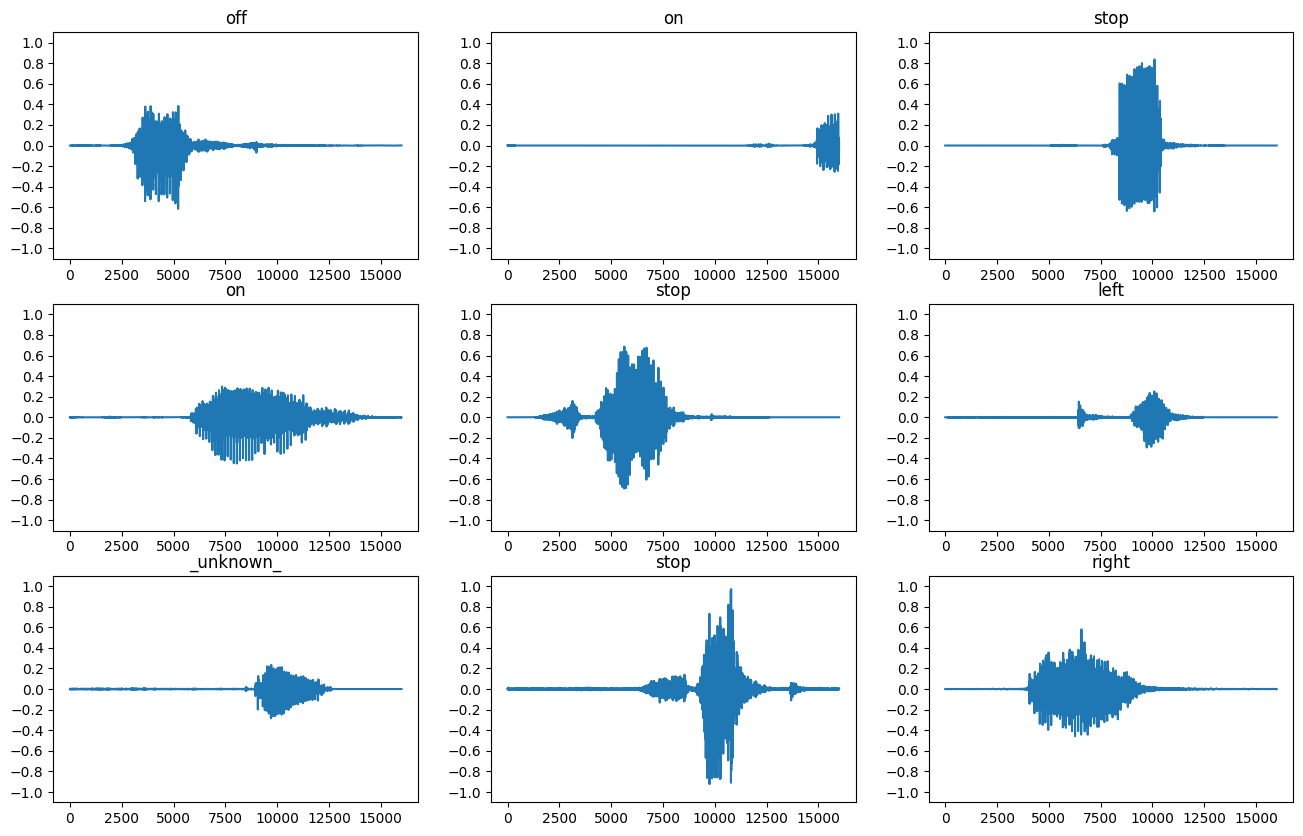

In [ ]:
# Let's plot a few audio waveforms:
plt.figure(figsize=(16, 10))
rows = 3
cols = 3
n = rows * cols
for i in range(n):
  plt.subplot(rows, cols, i+1)
  audio_signal = audio[i]
  plt.plot(audio_signal)
  plt.title(class_names[label[i]])
  plt.yticks(np.arange(-1.2, 1.2, 0.2))
  plt.ylim([-1.1, 1.1])

In [ ]:
def get_spectrogram(waveform):
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).

  spectrogram = spectrogram[..., tf.newaxis]

  return spectrogram

In [ ]:
for i in range(3):
  label_sample = label[i]
  waveform = audio[i]
  spectrogram = get_spectrogram(waveform)

  print('Label:', label_sample)
  print('Waveform shape:', waveform.shape)
  print('Spectrogram shape:', spectrogram.shape)
  print('Audio playback')
  display.display(display.Audio(waveform, rate=16000))

Label: tf.Tensor(4, shape=(), dtype=int64)
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


Label: tf.Tensor(5, shape=(), dtype=int64)
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


Label: tf.Tensor(7, shape=(), dtype=int64)
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


In [ ]:
# Now, create spectrogramn datasets from the audio datasets
def make_spec_ds(ds):
  return ds.map(
      map_func=lambda audio,label: (get_spectrogram(audio), label),
      num_parallel_calls=tf.data.AUTOTUNE)


train_spectrogram_ds = make_spec_ds(train_ds)
val_spectrogram_ds = make_spec_ds(val_ds)
test_spectrogram_ds = make_spec_ds(test_ds)

In [ ]:
for example_spectrograms, example_spect_labels in train_spectrogram_ds.take(1):
  break

In [ ]:
input_shape = example_spectrograms.shape[1:]
print('Input shape:', input_shape)
num_labels = len(class_names)

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=train_spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    layers.Resizing(32, 32),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])


model.summary()

Input shape: (124, 129, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizati  (None, 32, 32, 1)         3         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           

In [ ]:
num_labels

12

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [ ]:
# Train the model over 10 epochs for demonstration purposes:
EPOCHS = 15
history = model.fit(
    train_spectrogram_ds,
    validation_data=val_spectrogram_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=8),
)

Epoch 1/15
2673/2673 [==============================] - 146s 49ms/step - loss: 0.9503 - accuracy: 0.7107 - val_loss: 1.0879 - val_accuracy: 0.5869
Epoch 2/15
2673/2673 [==============================] - 137s 51ms/step - loss: 0.6108 - accuracy: 0.7998 - val_loss: 0.8591 - val_accuracy: 0.6973
Epoch 3/15
2673/2673 [==============================] - 150s 55ms/step - loss: 0.5034 - accuracy: 0.8353 - val_loss: 0.7358 - val_accuracy: 0.7528
Epoch 4/15
2673/2673 [==============================] - 133s 49ms/step - loss: 0.4413 - accuracy: 0.8550 - val_loss: 0.7600 - val_accuracy: 0.7550
Epoch 5/15
2673/2673 [==============================] - 134s 49ms/step - loss: 0.3958 - accuracy: 0.8704 - val_loss: 0.7336 - val_accuracy: 0.7616
Epoch 6/15
2673/2673 [==============================] - 137s 51ms/step - loss: 0.3625 - accuracy: 0.8818 - val_loss: 0.6510 - val_accuracy: 0.8006
Epoch 7/15
2673/2673 [==============================] - 135s 50ms/step - loss: 0.3339 - accuracy: 0.8892 - val_loss: 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save("/content/drive/MyDrive/TensorFlow_Machine_Learning/stanfard_model_test_samples/feature_extractor_audio")

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/TensorFlow_Machine_Learning/stanfard_model_test_samples/feature_extractor_audio")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizati  (None, 32, 32, 1)         3         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0

In [ ]:
test_ds

<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [168]:
test = random.choice(list(test_ds))

In [169]:
test

(<tf.Tensor: shape=(32, 16000), dtype=float32, numpy=
 array([[ 6.0768110e-05,  3.0384055e-05,  0.0000000e+00, ...,
         -9.6317455e-03, -8.3252313e-03, -7.3225573e-03],
        [-1.0057122e-02, -1.8300316e-01, -1.7668328e-01, ...,
         -1.3493559e-01, -2.3334953e-01, -1.8269932e-01],
        [ 2.6130287e-03,  2.4914925e-03,  2.9776373e-03, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [-6.0768110e-05, -5.7729706e-04, -8.2036946e-04, ...,
         -4.2537675e-04, -7.8998541e-04, -1.0938259e-03],
        [ 3.0384055e-05,  6.0768110e-05,  6.0768110e-05, ...,
          8.5075351e-04,  3.0384055e-05, -7.8998541e-04],
        [ 0.0000000e+00,  3.0384055e-05,  6.0768110e-05, ...,
          3.0384055e-05,  9.1152164e-05,  9.1152164e-05]], dtype=float32)>,
 <tf.Tensor: shape=(32,), dtype=int64, numpy=
 array([11,  6, 11, 11,  4,  3,  6, 11, 11,  4,  9,  2,  6,  3,  6,  7, 11,
         2, 11, 11, 11, 11, 11, 11, 11, 11,  7,  0,  8, 11,  7, 11])>)

In [172]:
test[1][1]

<tf.Tensor: shape=(), dtype=int64, numpy=6>

In [185]:
voice = test[0][4]

In [186]:
index = test[1][4]

In [187]:
result = class_names[index]
result,voice

('off',
 <tf.Tensor: shape=(16000,), dtype=float32, numpy=
 array([ 0.0000000e+00,  1.5192028e-04,  2.1268838e-04, ...,
         0.0000000e+00, -9.1152164e-05, -6.0768110e-05], dtype=float32)>)

In [188]:
voice

<tf.Tensor: shape=(16000,), dtype=float32, numpy=
array([ 0.0000000e+00,  1.5192028e-04,  2.1268838e-04, ...,
        0.0000000e+00, -9.1152164e-05, -6.0768110e-05], dtype=float32)>

In [189]:
display.display(display.Audio(voice, rate=16000))

In [210]:
x = voice

In [201]:
def get_spectrogram(waveform):
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).

  spectrogram = spectrogram[..., tf.newaxis]

  return spectrogram

In [202]:
x

<tf.Tensor: shape=(16000,), dtype=float32, numpy=
array([ 0.0000000e+00,  1.5192028e-04,  2.1268838e-04, ...,
        0.0000000e+00, -9.1152164e-05, -6.0768110e-05], dtype=float32)>

In [203]:
len(class_names)

12

In [204]:
x

<tf.Tensor: shape=(16000,), dtype=float32, numpy=
array([ 0.0000000e+00,  1.5192028e-04,  2.1268838e-04, ...,
        0.0000000e+00, -9.1152164e-05, -6.0768110e-05], dtype=float32)>

In [211]:

waveform = x
x = get_spectrogram(x)
x = x[tf.newaxis,...]
prediction = model(x)
display.display(display.Audio(waveform, rate=16000))
print(x.shape)
prediction

(1, 124, 129, 1)


<tf.Tensor: shape=(1, 12), dtype=float32, numpy=
array([[-14.6701   , -11.677174 ,  -3.6469555, -17.38035  ,   7.6421804,
         -1.8588185,  -9.201473 ,  -6.813077 ,   1.6387868,  -8.732675 ,
        -20.932457 ,  -1.1885375]], dtype=float32)>

In [212]:
result = tf.squeeze(tf.round(prediction))

In [213]:
result

<tf.Tensor: shape=(12,), dtype=float32, numpy=
array([-15., -12.,  -4., -17.,   8.,  -2.,  -9.,  -7.,   2.,  -9., -21.,
        -1.], dtype=float32)>

In [226]:
class_names[tf.argmax(result)]

'off'

In [220]:
guess = model.predict(x)
guess

1/1 [==============================] - 0s 22ms/step


array([[-14.6701   , -11.677174 ,  -3.6469555, -17.38035  ,   7.6421804,
         -1.8588185,  -9.201473 ,  -6.813077 ,   1.6387868,  -8.732675 ,
        -20.932457 ,  -1.1885375]], dtype=float32)

In [221]:
guess = tf.squeeze(tf.round(guess))
guess

<tf.Tensor: shape=(12,), dtype=float32, numpy=
array([-15., -12.,  -4., -17.,   8.,  -2.,  -9.,  -7.,   2.,  -9., -21.,
        -1.], dtype=float32)>

In [222]:
guess = tf.argmax(guess)
guess

<tf.Tensor: shape=(), dtype=int64, numpy=4>

In [223]:

class_names[guess.numpy()]

'off'

In [224]:
display.display(display.Audio(voice, rate=16000))

In [225]:
class_names

['down',
 'go',
 'left',
 'no',
 'off',
 'on',
 'right',
 'stop',
 'up',
 'yes',
 '_silence_',
 '_unknown_']

In [227]:
model.save("/content/drive/MyDrive/Saved_TensorFlow_Models/recognize_keyword_with_more_data")